# With added fully connected layer

## Load data

In [1]:
import pandas as pd


df = pd.read_csv('tf_results/results_with_added_fc.csv')
df.columns

Index(['Lang Class', 'Lang Subclass', 'Train Size', 'Model', 'Embd Dim',
       'EarlyStop', 'Round #', 'Test Set', 'Accuracy', 'Recall', 'Precision'],
      dtype='object')

## Summarize data

In [2]:
def _extract(df, key, conds):    
    
    cond = []
    
    for k, v in conds.items():
        cond.append(df[k] == v)

    cond = list(map(all, zip(*cond)))
    
    out = df[cond][key]

    return out


def get_stats(df, langSubclass, trainSize, model, 
              embdDim, earlyStop, testSet):
    
    val_keys = ['Accuracy', 'Recall', 'Precision']
    conds = {'Lang Subclass': langSubclass, 
             'Train Size': trainSize, 
             'Model': model, 
             'Embd Dim': embdDim, 
             'EarlyStop': earlyStop, 
             'Test Set': testSet}
    
    return _extract(df, val_keys, conds).mean().tolist()


def get_summary(df):
    summary = []
    
    for sl in df['Lang Subclass'].unique():
        for size in df['Train Size'].unique():
            for model in df['Model'].unique():
                for dim in df['Embd Dim'].unique():
                    for stop in df['EarlyStop'].unique():
                        for test in df['Test Set'].unique():
                            stat = get_stats(df, sl, size, 
                                             model, dim, stop, test)
                            summary.append([sl[:2], sl, size, model, 
                                            dim, stop, test] + stat)
                            
    return summary

In [3]:
summary = get_summary(df)
cols = ['Lang Class', 'Lang Subclass', 'Train Size', 
        'Model', 'Embd Dim', 'EarlyStop', 'Test Set', 
        'Accuracy', 'Recall', 'Precision']

writer = pd.ExcelWriter('tf_results/results_with_added_fc.xlsx')
df.to_excel(writer, sheet_name='Raw', index=False)
df_sum = pd.DataFrame(summary, columns=cols)
df_sum.to_excel(writer, sheet_name='Summary', index=False)
writer.close()

## Visualize data

In [4]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [5]:
def get_metric(df, metric, model, 
               testSet, trainSize, embdDim, EarlyStop=False):
    
    conds = {'Model': model, 
             'Test Set': testSet, 
             'Train Size': trainSize, 
             'Embd Dim': embdDim, 
             'EarlyStop': EarlyStop}
    
    return _extract(df, metric, conds).item()



def plot(df, metric='Accuracy', nrow=2, ncol=3, 
         earlystop=False, save_path=None, 
         single_baseline_idx=None):
    
    fig = plt.figure(figsize=(30, 15))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
            
    baselines = [[0.855, 0.844, 1.0, 1.0, 1.0, 1.0], 
                 [0.918, 0.813, 0.995, 0.978, 1.0, 1.0], 
                 [0.991, 0.996, 0.998, 0.994, 1.0, 1.0], 
                 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
                 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
                 [0.817, 0.587, 0.873, 0.634, 1.0, 1.0]]
    
    if single_baseline_idx:
        baselines = [baselines[single_baseline_idx]]
        
    
    retrieve_idx = [[0, 2, 4], [1, 3, 5]]
    
    subclasses = df['Lang Subclass'].unique()
    models = df['Model'].unique()
    model_colors = ['b', 'g']

    tests = df['Test Set'].unique()
    test_linestyles = ['solid', 'dotted']

    sizes = df['Train Size'].unique()
    embd_dims = [10, 30, 100]
    
    for i, sl in enumerate(subclasses):
    
        sub = df[df['Lang Subclass'] == sl]
        ax = fig.add_subplot(nrow, ncol, i+1)
    
        for model, c in zip(models, model_colors):
        
            for j, (test, sty) in enumerate(
                zip(tests, test_linestyles)):
            
                X = []; Y = []

                for z, size in enumerate(sizes):
                
                    for dim in embd_dims:
                    
                        X.append(f"{size}_v{dim}")
                        Y.append(get_metric(sub, 'Accuracy', 
                                            model, test, size, 
                                            dim, earlystop))
        
                ax.plot(X, Y, c=c, linestyle=sty, 
                        marker='o', label=f"{model} for {test}")
            
        baseline_test1_Y = [baselines[i][idx] for idx in retrieve_idx[0] for _ in range(3)]
        baseline_test2_Y = [baselines[i][idx] for idx in retrieve_idx[1] for _ in range(3)]
    
        ax.plot(X, baseline_test1_Y, c='r', linestyle=test_linestyles[0], 
                marker='o', label=f'baseline for Test1')
    
        ax.plot(X, baseline_test2_Y, c='r', linestyle=test_linestyles[1], 
                marker='o', label=f'baseline for Test2')
        
        ax.set_xlabel('TrainSize_EmbdDim')
        ax.set_ylabel('Accuracy')
        ax.set_title(sl)
        
        ax.legend(loc='lower right')
        ax.grid(True)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

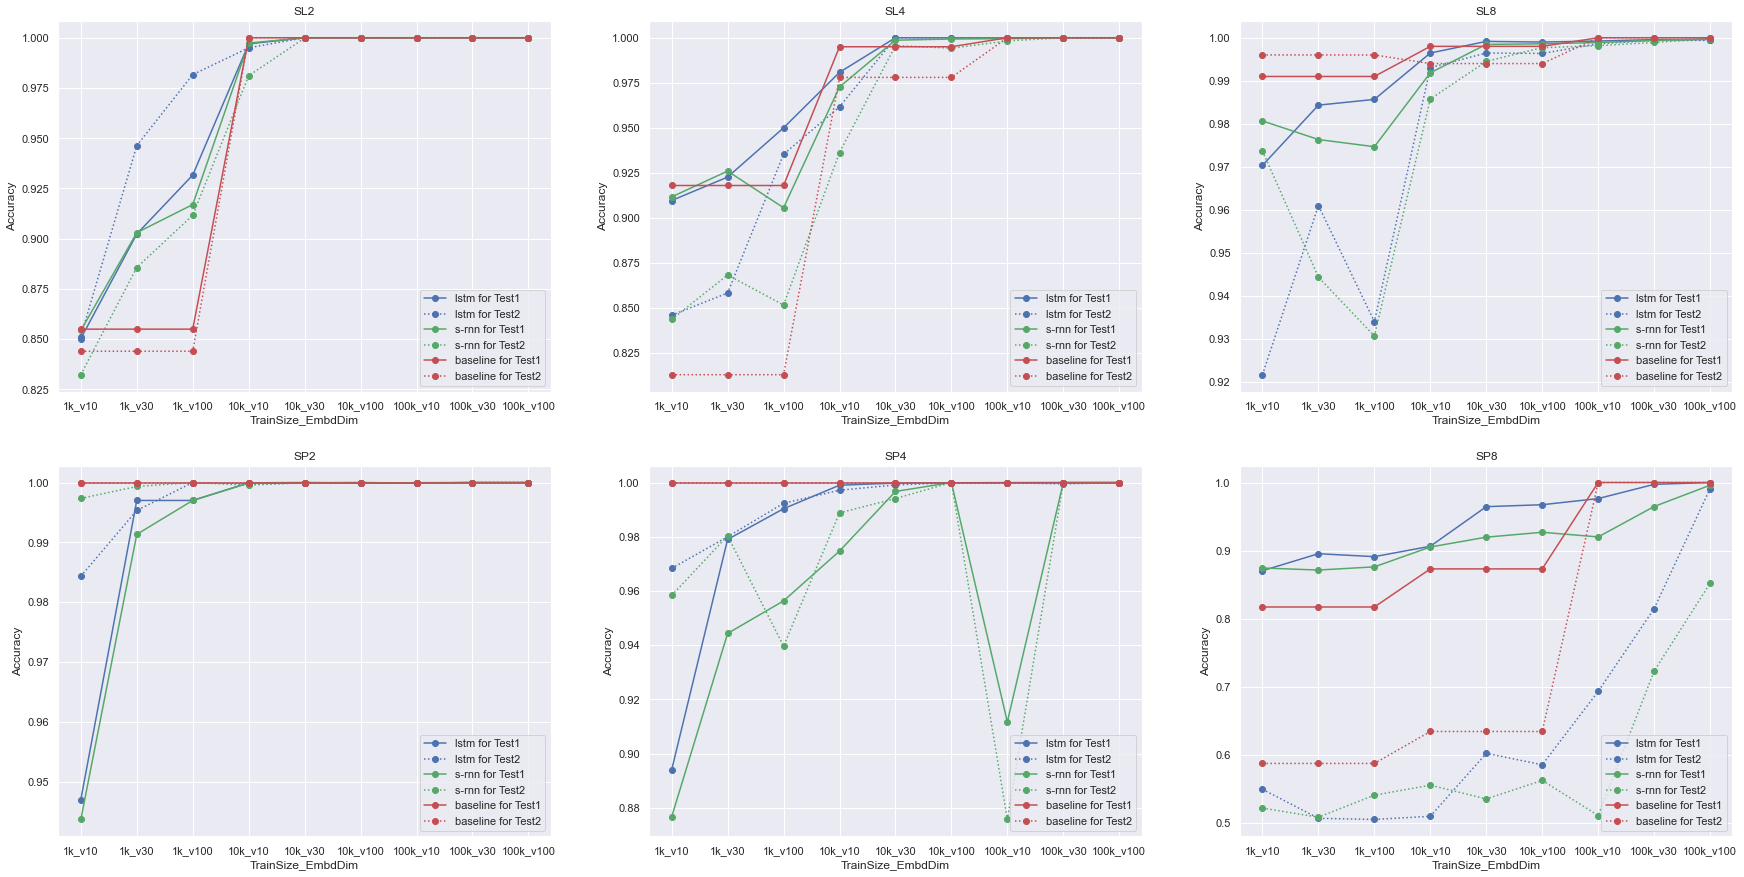

In [6]:
plot(df_sum, earlystop=False, save_path='plots/With_added_fc_no_earlyStop.png')

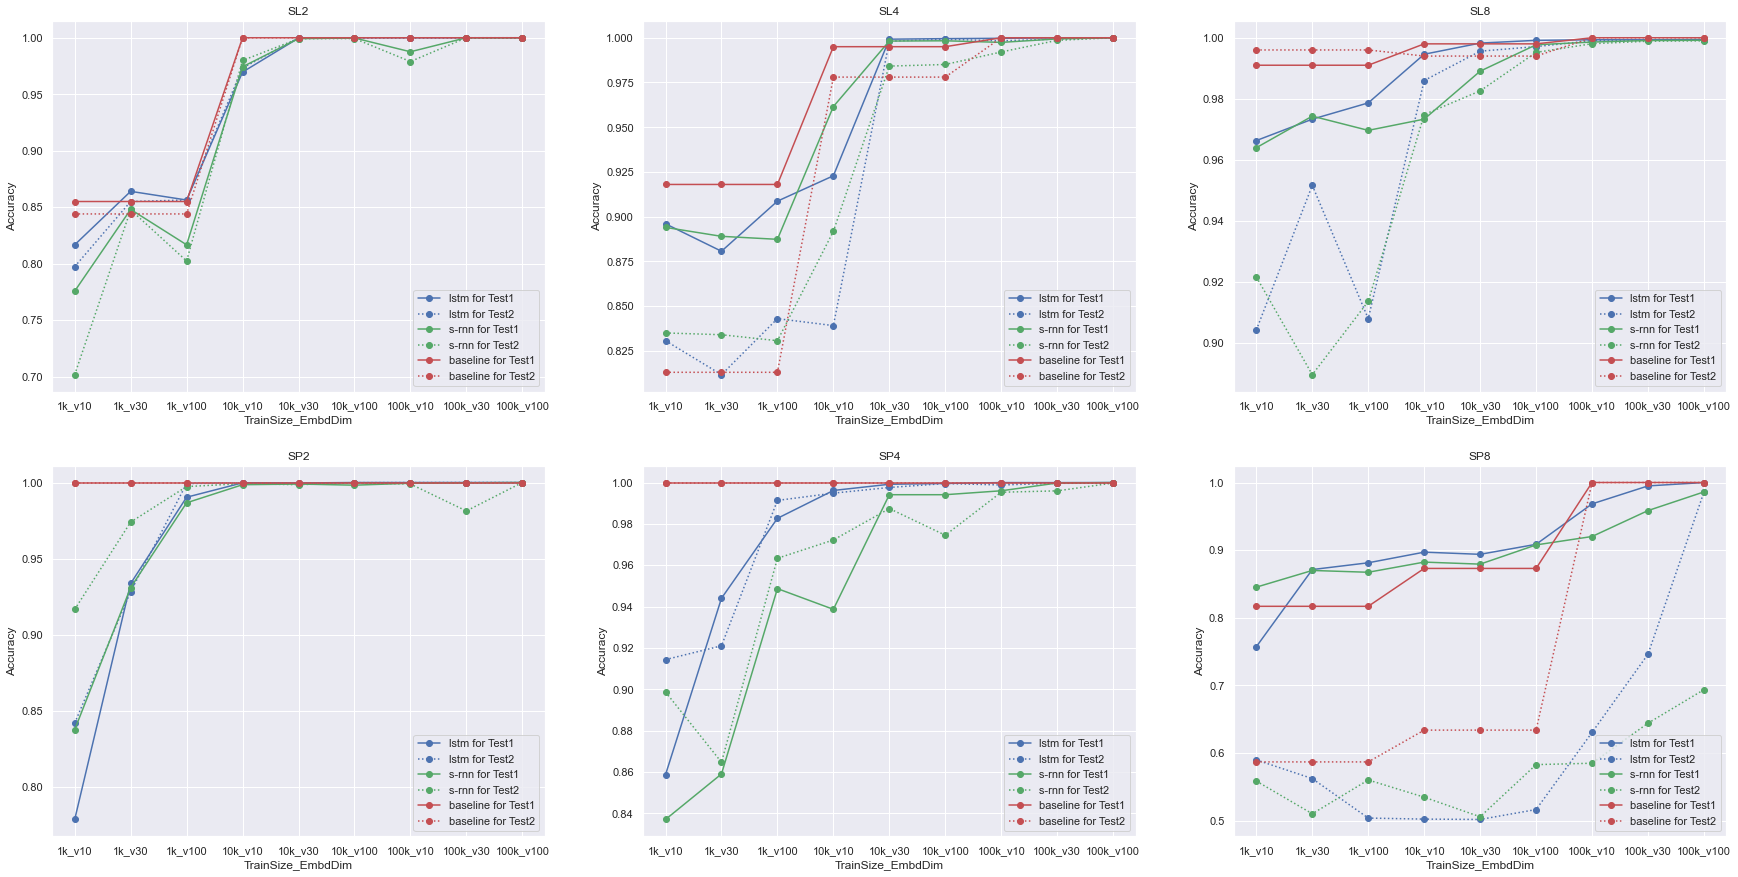

In [7]:
plot(df_sum, earlystop=True, save_path='plots/With_added_fc_with_earlyStop.png')

## SP8 Check

In [8]:
df_sp8 = pd.read_csv("tf_results/SP8_results_with_added_fc.csv")
summary = get_summary(df_sp8)
cols = ['Lang Class', 'Lang Subclass', 'Train Size', 
        'Model', 'Embd Dim', 'EarlyStop', 'Test Set', 
        'Accuracy', 'Recall', 'Precision']

writer = pd.ExcelWriter('tf_results/SP8_results_with_added_fc.xlsx')
df_sp8.to_excel(writer, sheet_name='Raw', index=False)
df_sp8_sum = pd.DataFrame(summary, columns=cols)
df_sp8_sum.to_excel(writer, sheet_name='Summary', index=False)
writer.close()

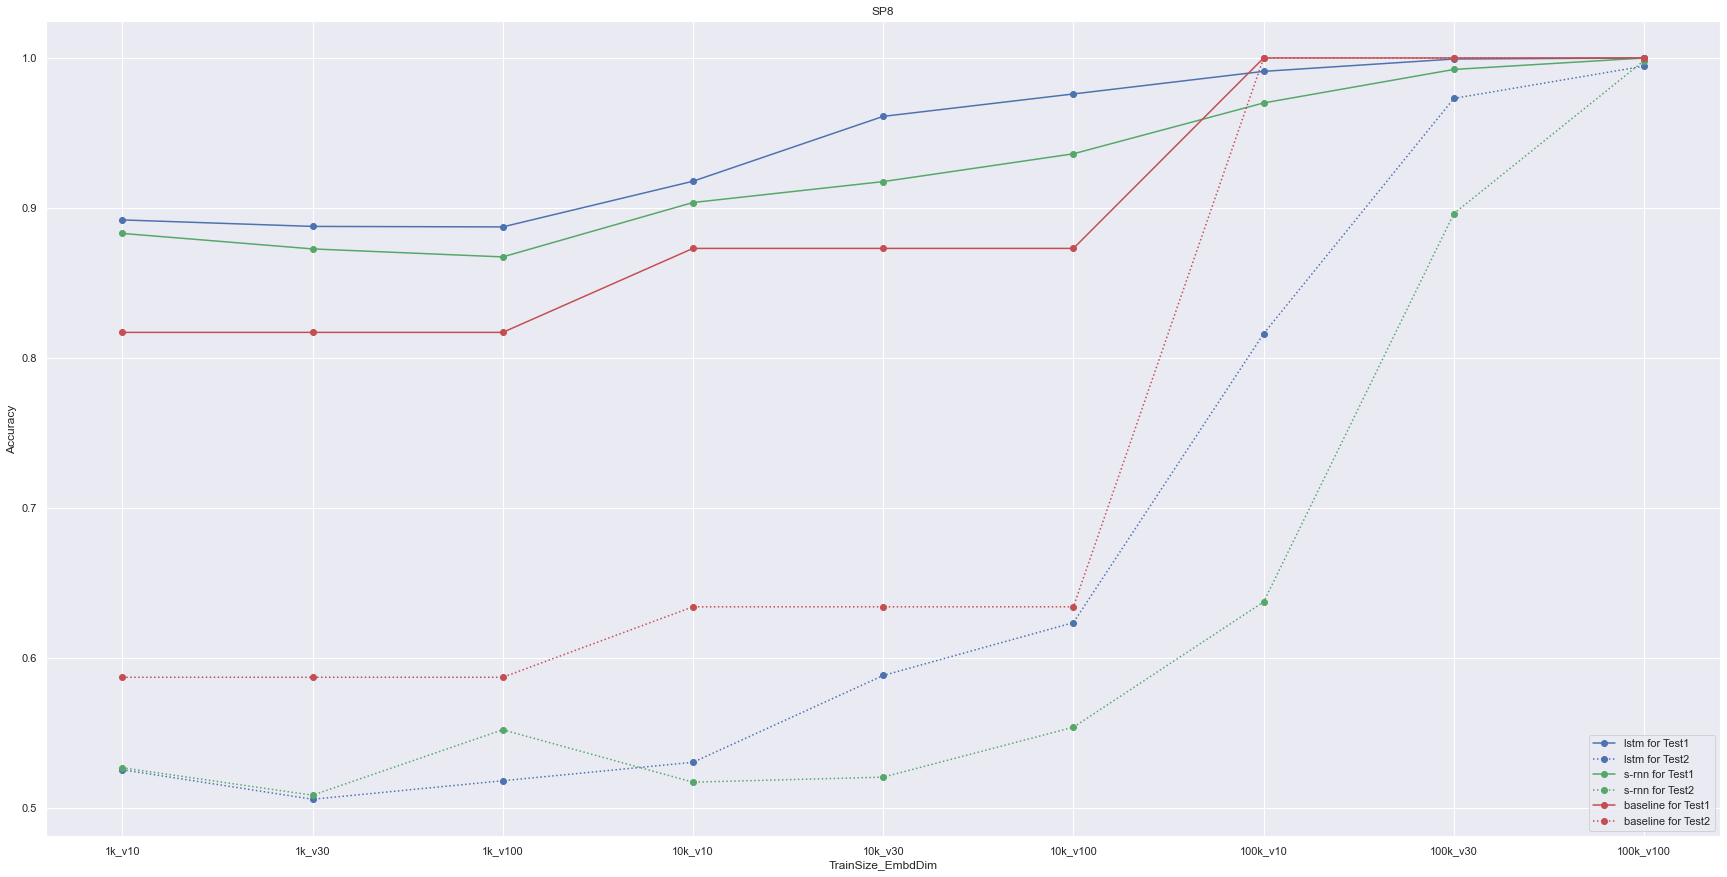

In [9]:
plot(df_sp8_sum, nrow=1, ncol=1, earlystop=False, 
     save_path='plots/SP8_With_added_fc_no_earlyStop.png', single_baseline_idx=-1)

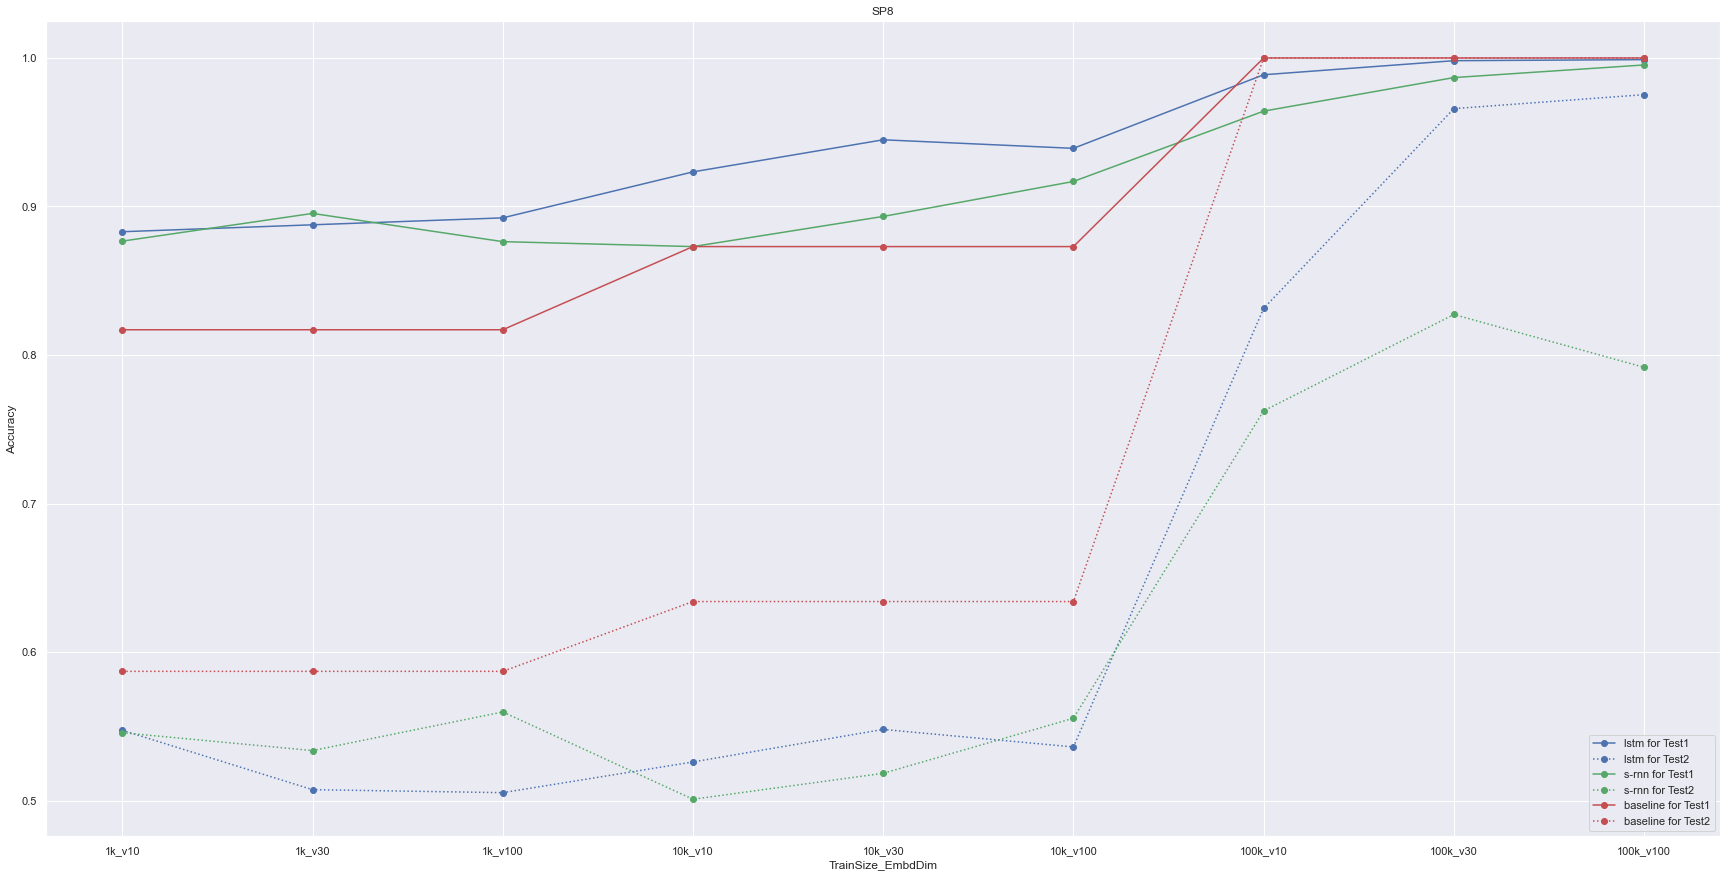

In [10]:
plot(df_sp8_sum, nrow=1, ncol=1, earlystop=True, 
     save_path='plots/SP8_With_added_fc_with_earlyStop.png', single_baseline_idx=-1)

# Without added fully connected layer

In [11]:
import pandas as pd


df_naive = pd.read_csv('tf_results/results_naive.csv')
summary = get_summary(df_naive)
cols = ['Lang Class', 'Lang Subclass', 'Train Size', 
        'Model', 'Embd Dim', 'EarlyStop', 'Test Set', 
        'Accuracy', 'Recall', 'Precision']

writer = pd.ExcelWriter('tf_results/results_naive.xlsx')
df_naive.to_excel(writer, sheet_name='Raw', index=False)
df_naive_sum = pd.DataFrame(summary, columns=cols)
df_naive_sum.to_excel(writer, sheet_name='Summary', index=False)
writer.close()

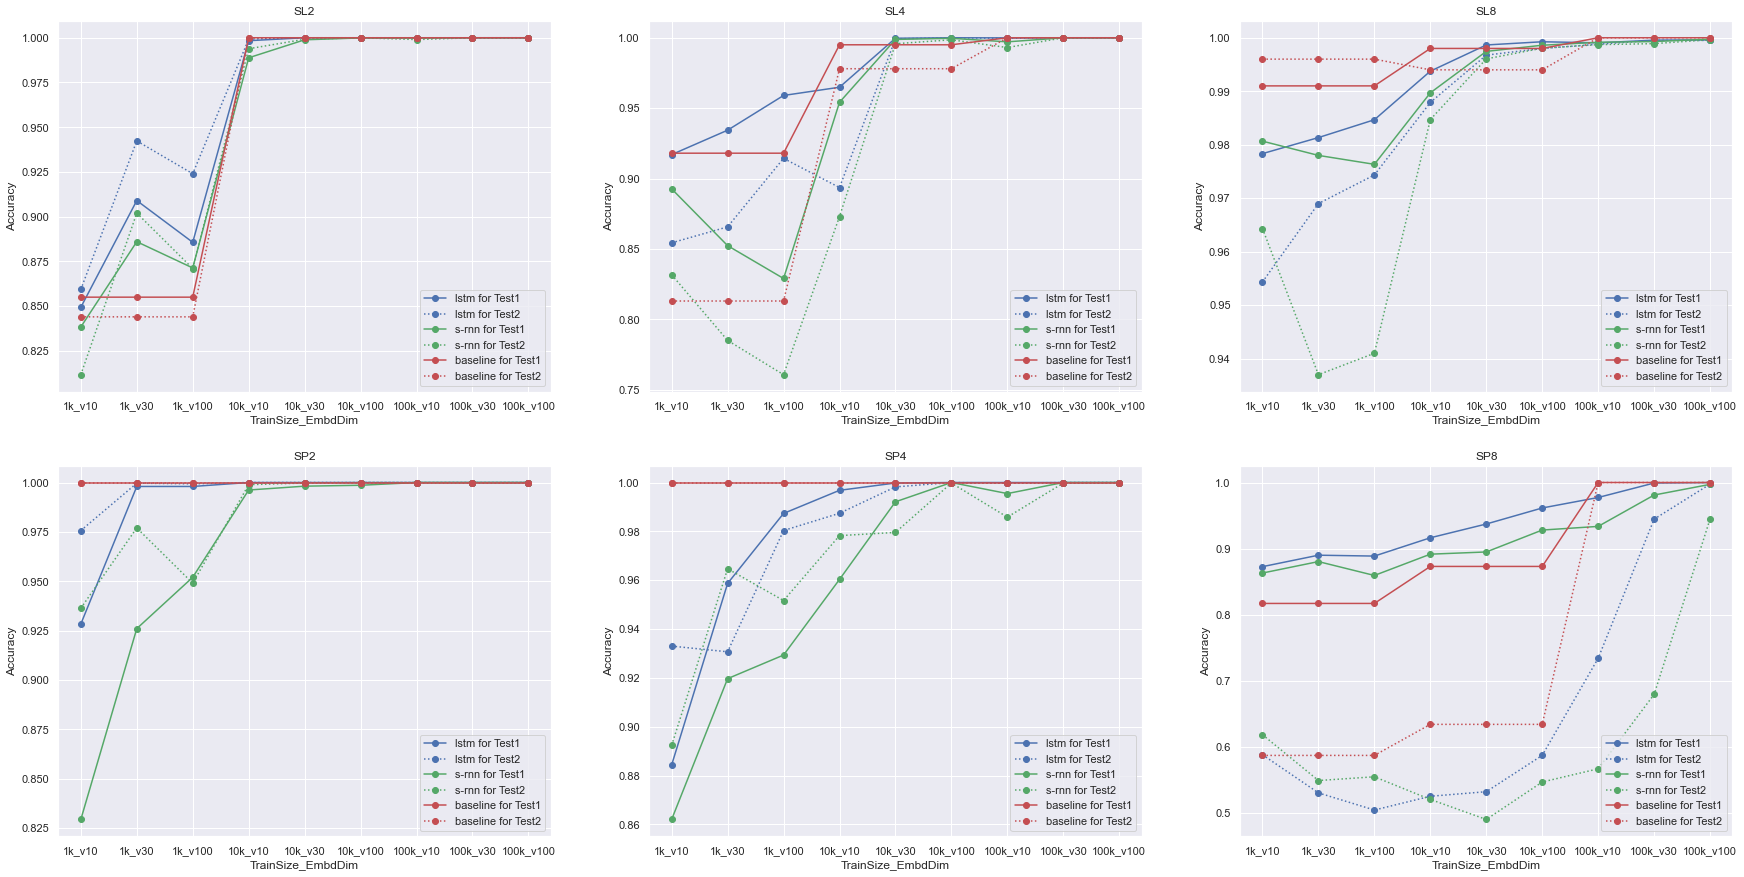

In [12]:
plot(df_naive_sum, earlystop=False, save_path='plots/Naive_no_earlyStop.png')

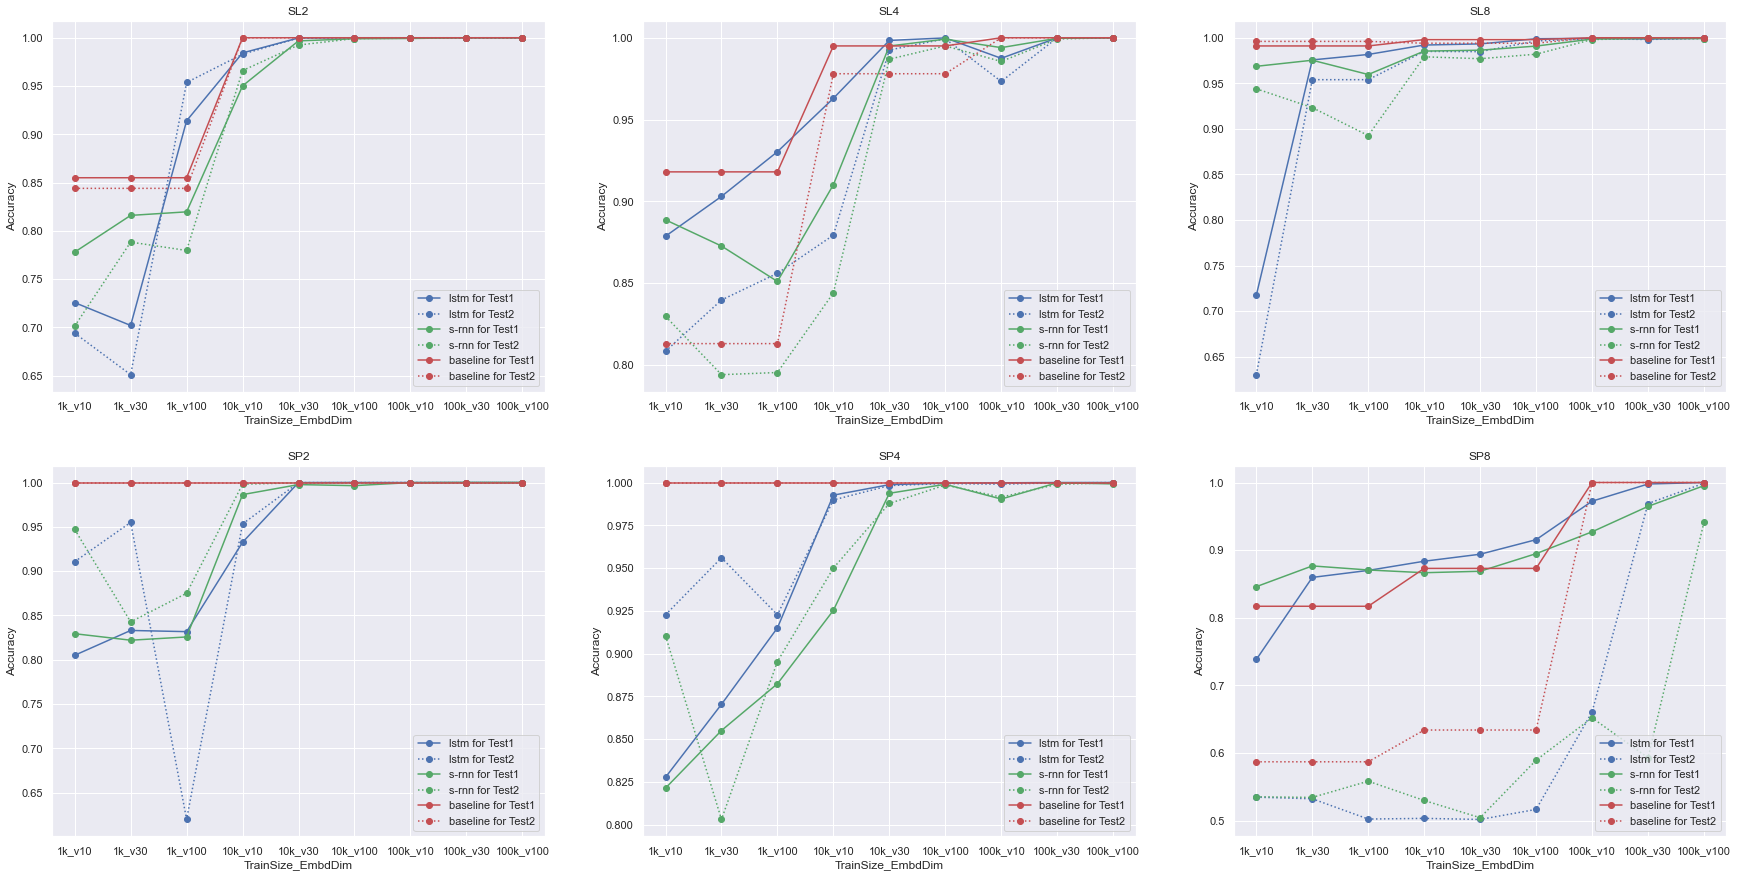

In [13]:
plot(df_naive_sum, earlystop=True, save_path='plots/Naive_with_earlyStop.png')

## SP8 Check

In [14]:
df_sp8_naive = pd.read_csv("tf_results/SP8_results_naive.csv")
summary = get_summary(df_sp8_naive)
cols = ['Lang Class', 'Lang Subclass', 'Train Size', 
        'Model', 'Embd Dim', 'EarlyStop', 'Test Set', 
        'Accuracy', 'Recall', 'Precision']

writer = pd.ExcelWriter('tf_results/SP8_results_naive.xlsx')
df_sp8_naive.to_excel(writer, sheet_name='Raw', index=False)
df_sp8_naive_sum = pd.DataFrame(summary, columns=cols)
df_sp8_naive_sum.to_excel(writer, sheet_name='Summary', index=False)
writer.close()

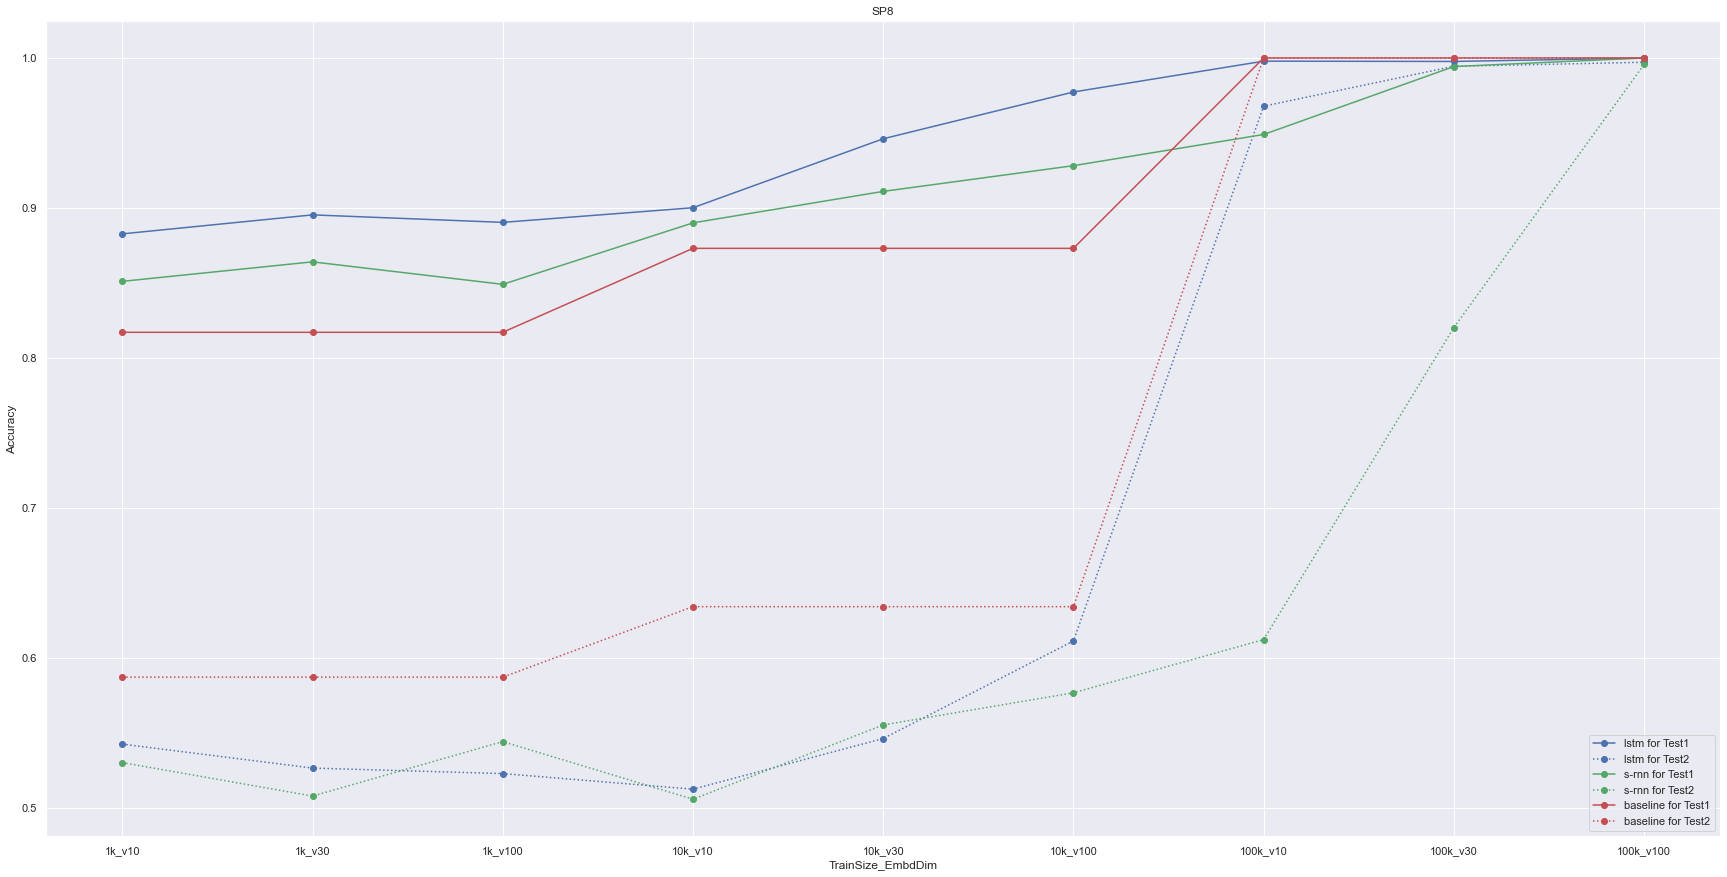

In [15]:
plot(df_sp8_naive_sum, nrow=1, ncol=1, earlystop=False, 
     save_path='plots/SP8_Naive_no_earlyStop.png', single_baseline_idx=-1)

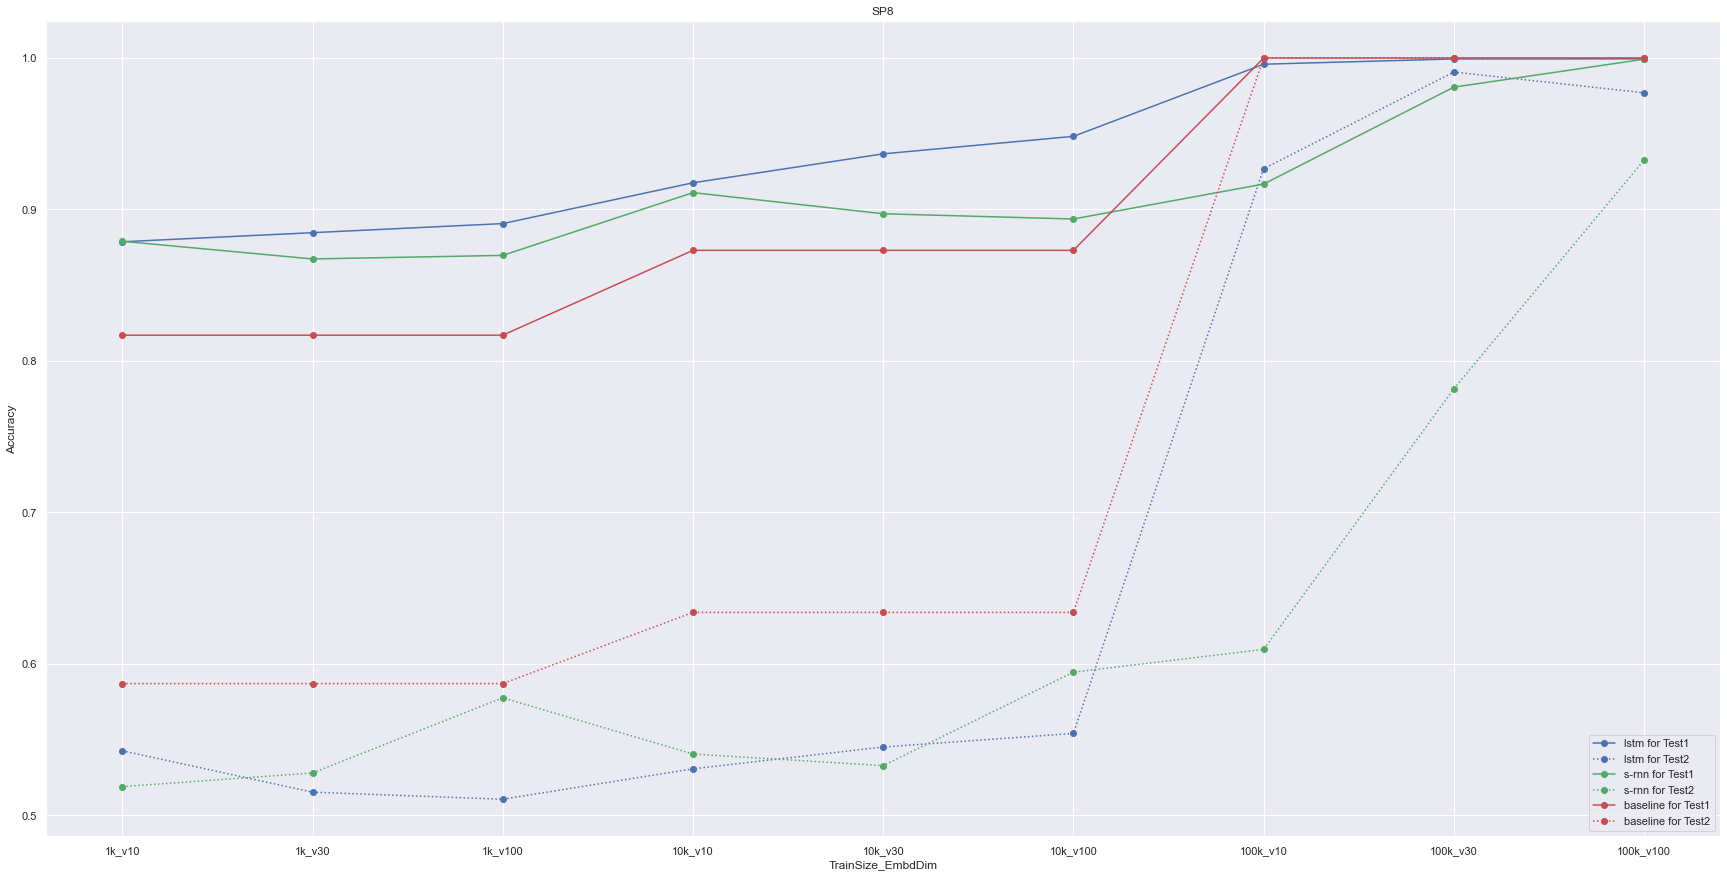

In [16]:
plot(df_sp8_naive_sum, nrow=1, ncol=1, earlystop=True, 
     save_path='plots/SP8_Naive_with_earlyStop.png', single_baseline_idx=-1)